<a href="https://colab.research.google.com/github/Saadi128/EDA-PROJECT-REPORT/blob/main/Module_Assignment_%7C_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Data Preparation
First we split the dataset into training and testing set (80%-20%)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


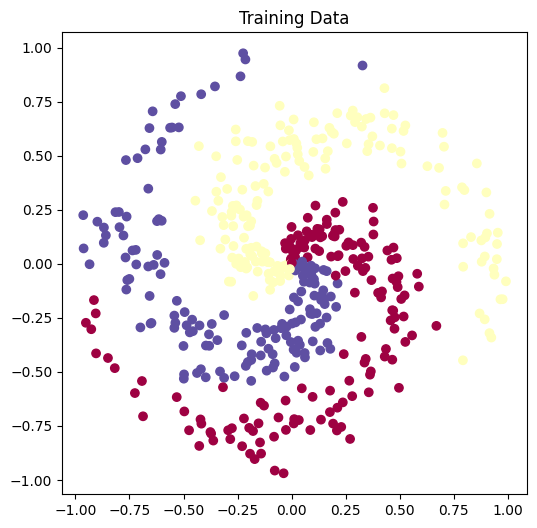

In [2]:
# Data generation function
def generate_harder_spiral_data(points_per_class=200, noise=0.4, num_classes=3):
    N = points_per_class
    D = 2
    K = num_classes
    X = np.zeros((N*K, D))
    y = np.zeros(N*K, dtype='uint8')

    for j in range(K):
        ix = range(N*j, N*(j+1))
        r = np.linspace(0.0, 1, N)
        t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*noise
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        y[ix] = j

    return X, y

# Generate data
X, y = generate_harder_spiral_data()

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualize
plt.figure(figsize=(6,6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="Spectral")
plt.title('Training Data')
plt.show()

2. Model Building Using TensorFlow/Keras to build a Multilayer Perceptron (MLP) classifier


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [4]:
# Define model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/500


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.4978 - loss: 0.9741 - val_accuracy: 0.5500 - val_loss: 0.7887
Epoch 2/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5438 - loss: 0.7643 - val_accuracy: 0.6250 - val_loss: 0.6559
Epoch 3/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6973 - loss: 0.6180 - val_accuracy: 0.7250 - val_loss: 0.6320
Epoch 4/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8086 - loss: 0.4913 - val_accuracy: 0.8250 - val_loss: 0.4645
Epoch 5/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8522 - loss: 0.4172 - val_accuracy: 0.8750 - val_loss: 0.2951
Epoch 6/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9028 - loss: 0.2923 - val_accuracy: 0.8750 - val_loss: 0.3177
Epoch 7/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8879 - loss: 0.2508 - val_accuracy: 0.9667 - val_loss: 0.1679
Epoch 8/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9536 - loss: 0.1575 - val_accuracy: 0.9417 - val_loss:

3. Model Evaluation We visualize training loss, accuracy and decision boundaries.


In [5]:
import matplotlib.pyplot as plt


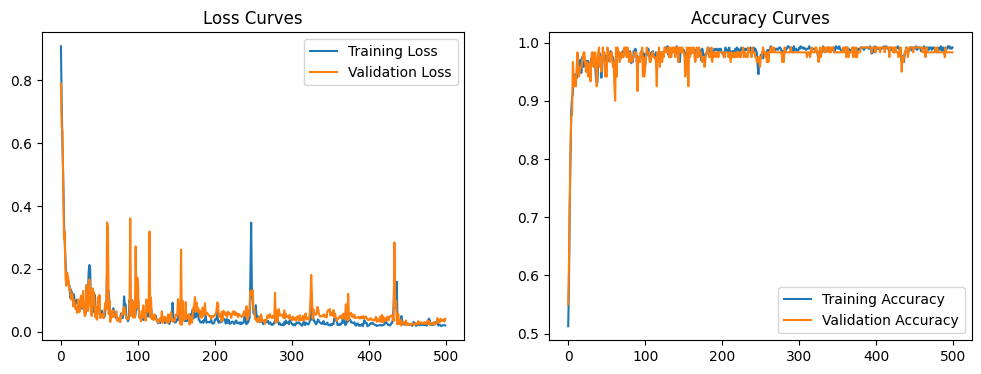

In [6]:
# Plot training and validation loss curves
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Curves')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Curves')

plt.show()

4. Decision Boundary Plot to visualize how well the model distinguishes classes


In [7]:
import numpy as np


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


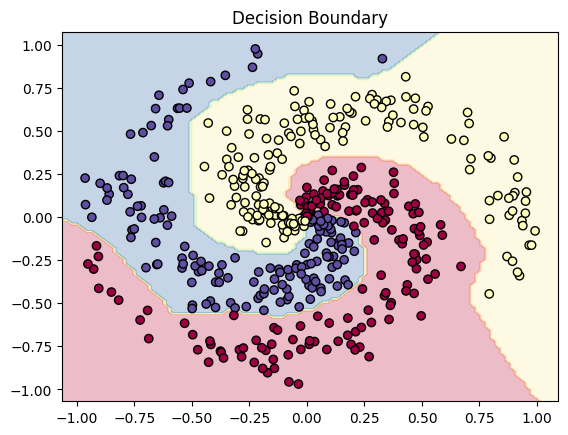

In [8]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    X_grid = np.c_[xx.ravel(), yy.ravel()]
    y_pred = model.predict(X_grid)
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)

    plt.contourf(xx, yy, y_pred, alpha=0.3, cmap='Spectral')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='Spectral')
    plt.title('Decision Boundary')
    plt.show()

plot_decision_boundary(model, X_train, y_train)

5. Reflection Questions
- Hidden Layers & Neurons: Based on experimentation, two hidden layers with 64 neurons each worked well in capturing complexity.
- Learning Rate: A learning rate of 0.01 gave stable results, while higher rates caused erratic training.
- Overfitting/Underfitting: Training for 500 epochs helped reduce underfitting. Regularization methods (Dropout or L2 penalty) could improve results.
- Improvements: Experimenting with different activation functions, optimizers (SGD, RMSprop), or adding more layers could further refine the model
